In [1]:
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("F0047CH1.CSV")
data.head()

,Record Length,2.500000e+03,Unnamed: 2,-0.004000000000,-0.00800,Unnamed: 5
0,Sample Interval,1.000000e-04,NaN,-0.0039,-0.056,NaN
1,Trigger Point,4.000000000000e+01,NaN,-0.0038,-0.128,NaN
2,NaN,NaN,NaN,-0.0037,-0.056,NaN
3,NaN,NaN,NaN,-0.0036,-0.056,NaN
4,NaN,NaN,NaN,-0.0035,-0.144,NaN


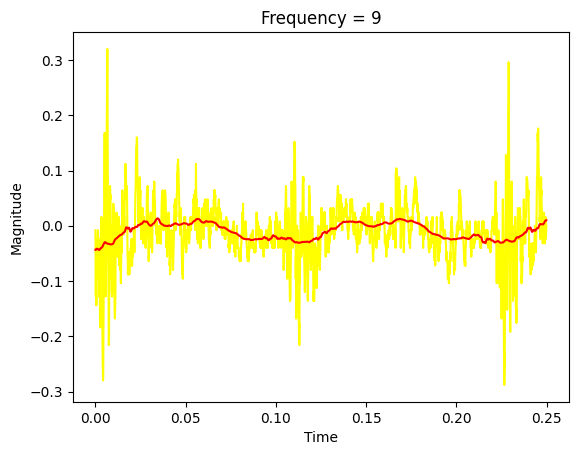

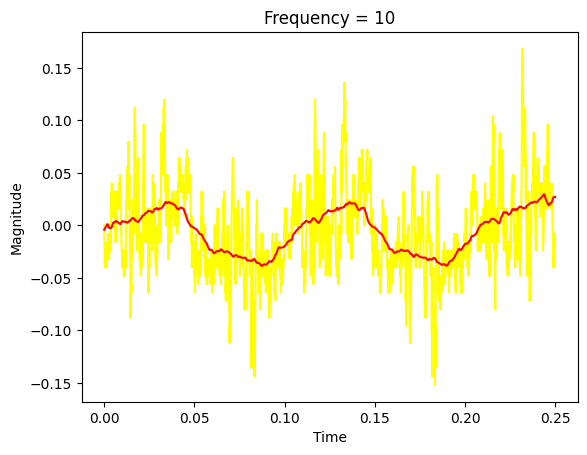

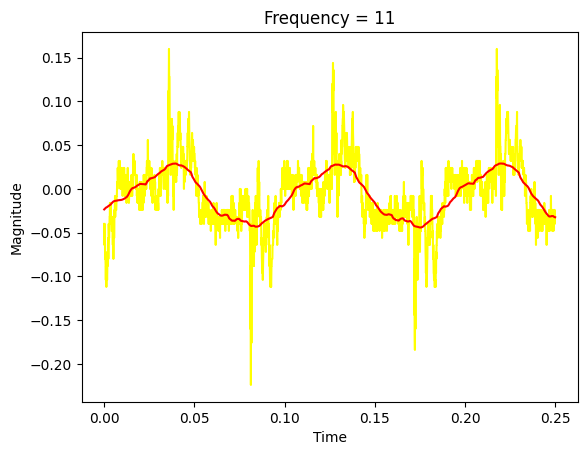

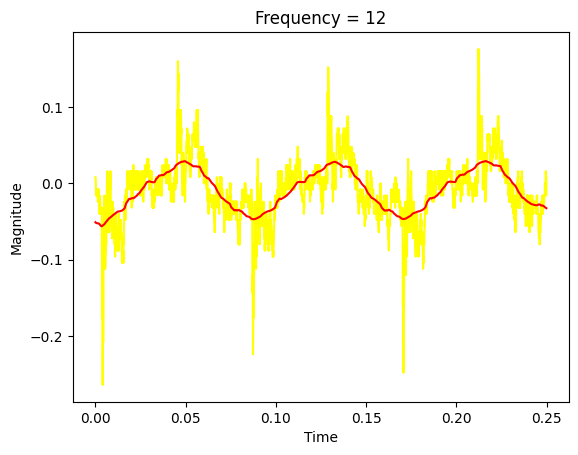

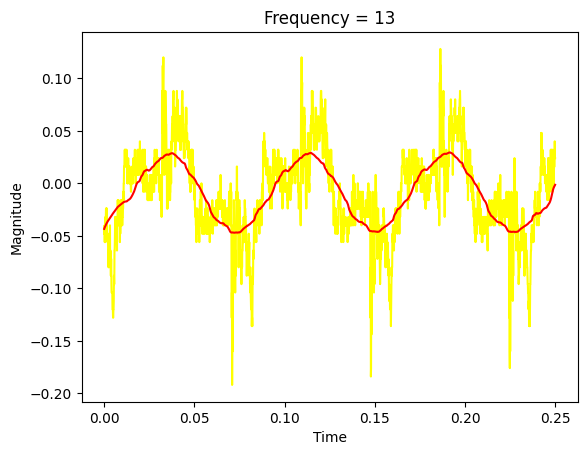

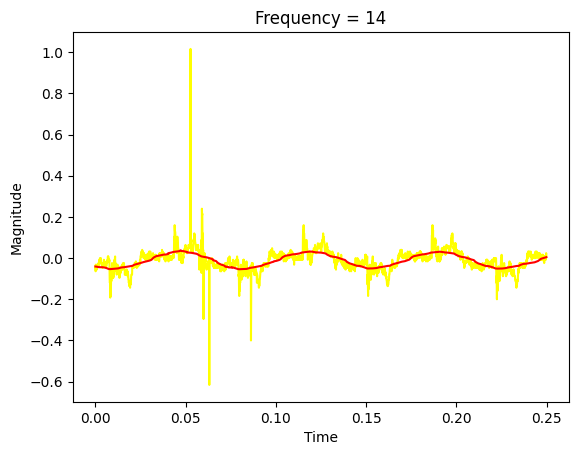

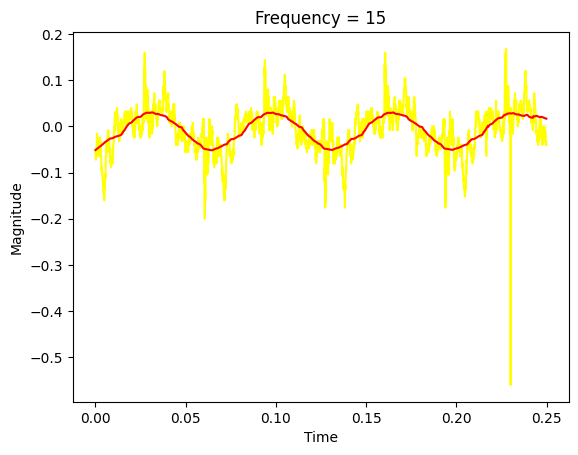

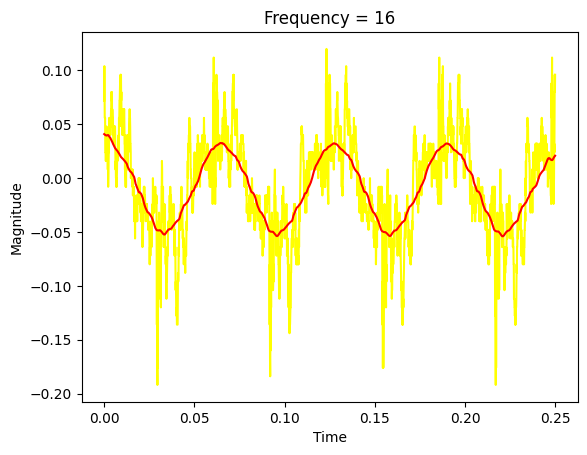

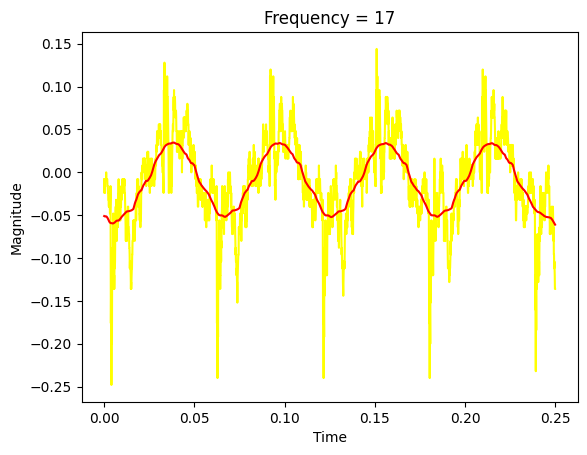

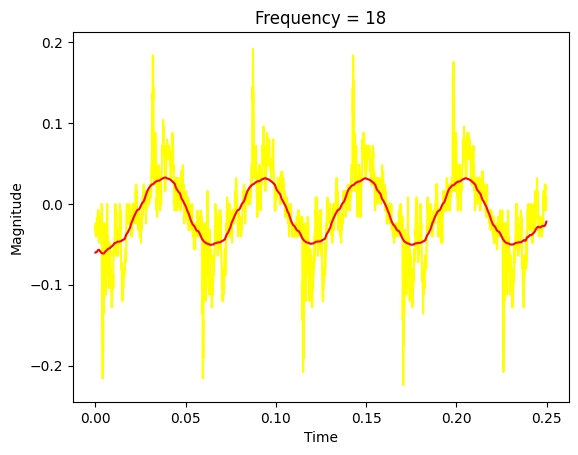

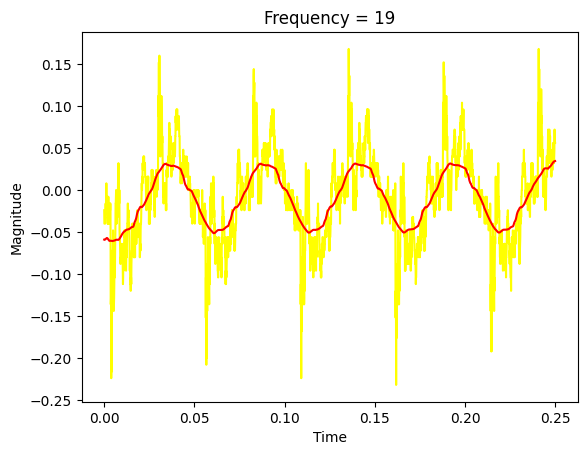

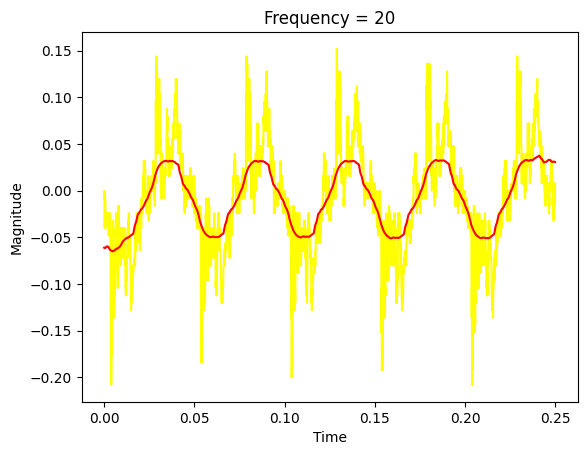

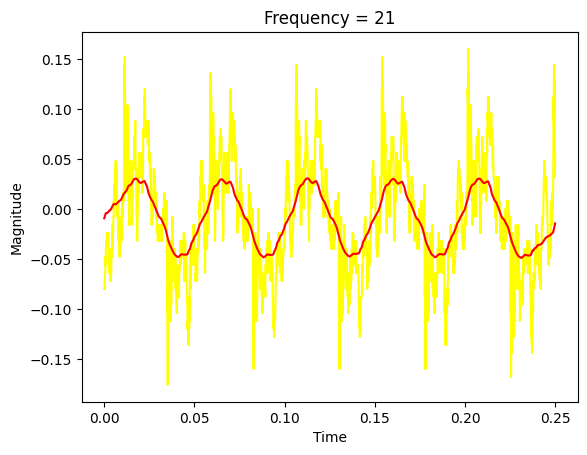

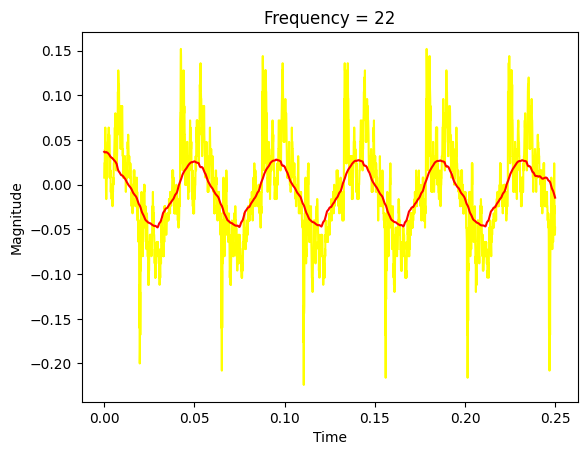

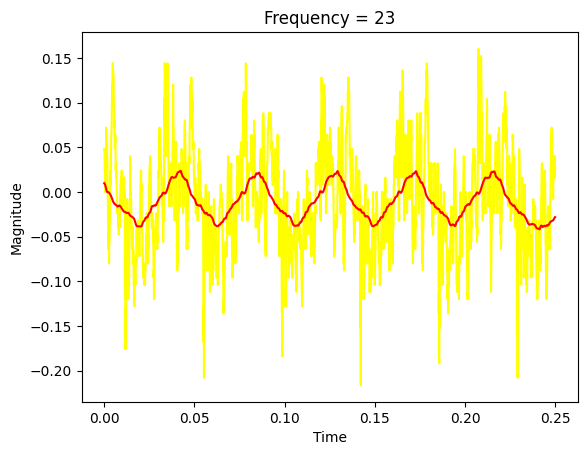

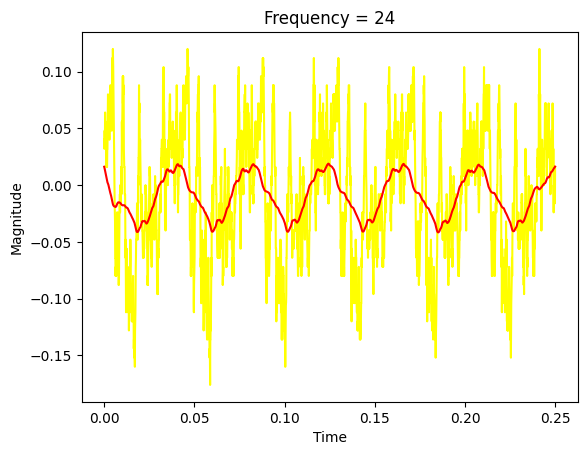

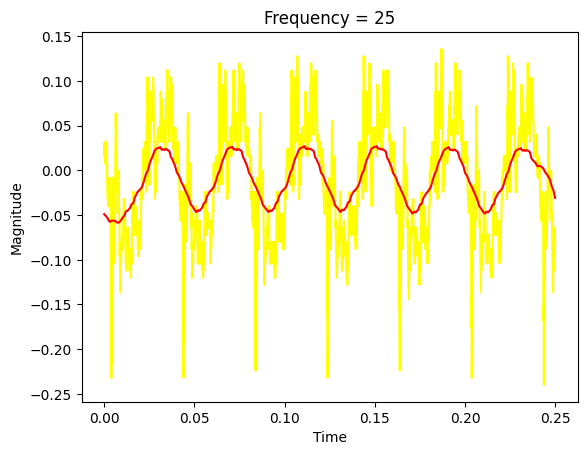

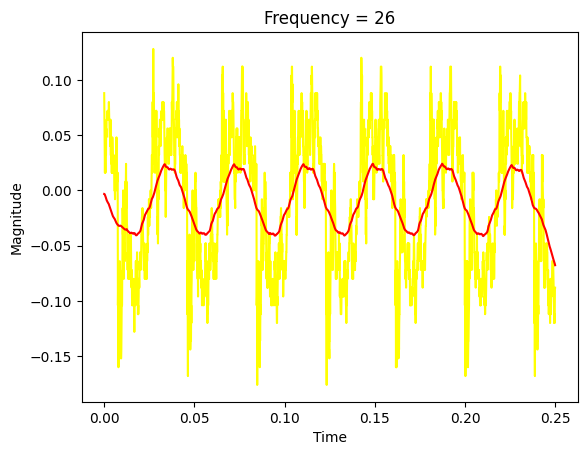

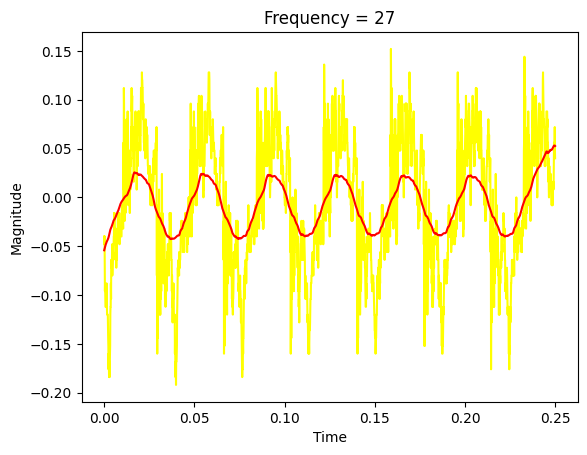

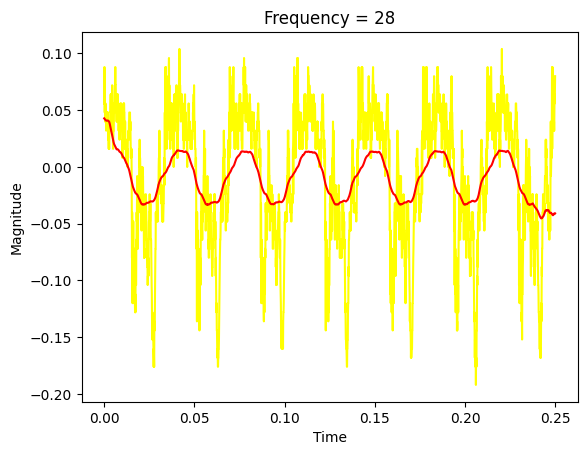

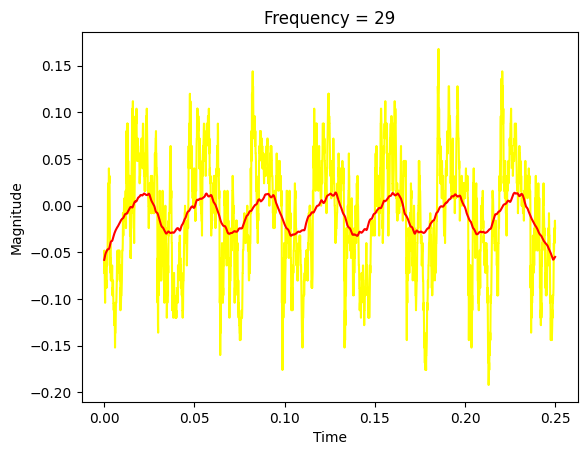

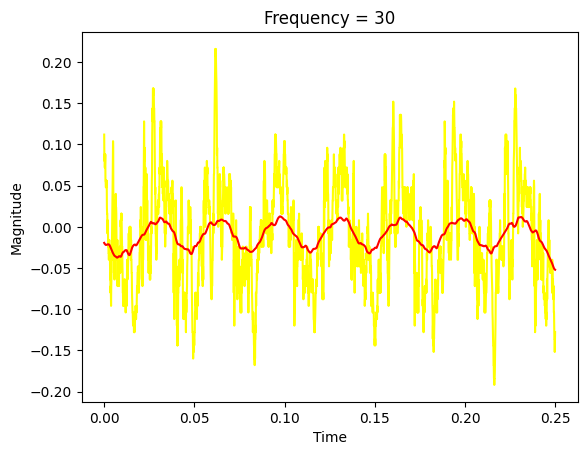

In [9]:
harmonics=[]
for i in range(47,69):
  name = "F00"+str(i)+"CH1.CSV"
  data = pd.read_csv(name)
  data = data[data.columns[-3:-1]]
  map={
      'time':float(data.columns[0]),
      'mag':float(data.columns[1])
  }
  data.columns=['time','mag']
  data = pd.concat([pd.DataFrame(map,index=[0]),data])
  data[data.columns[0]]=data[data.columns[0]]+0.0040
  plt.plot(data[data.columns[0]],data['mag'],color='yellow')
  plt.title("Frequency = "+str(i-38))
  plt.xlabel("Time")
  plt.ylabel("Magnitude")
  trend = data['mag'].rolling(
      window=len(data)//10,
      center=True,
      min_periods=6
  ).mean()
  plt.plot(data[data.columns[0]],trend,color='red')
  plt.show()
  fourier = fft(trend.values)
  fourier = np.abs(fourier[0:30])/(len(trend)/2)
  harmonic, content=0,0
  for  j in range(2,30):
    if fourier[j]>content:
      content=fourier[j];
      harmonic=j

  harmonics.append(harmonic)

Text(0, 0.5, 'Pre-dominant Harmonic')

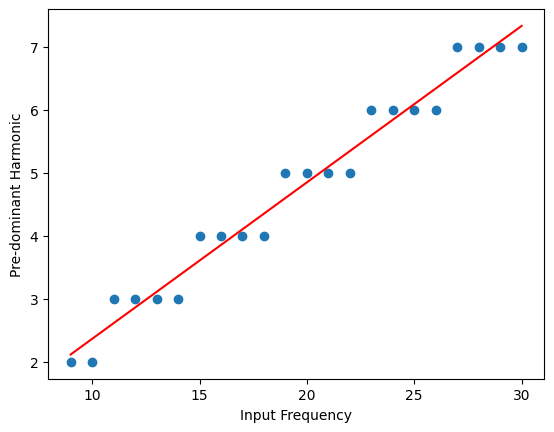

In [11]:
x=[]
sub=10
for i in range(9,31):
    x.append(i)

plt.scatter(x,harmonics)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(x).reshape(-1,1),np.array(harmonics).reshape(-1,1))
plt.plot(x,model.predict(np.array(x).reshape(-1,1)),color="red")
plt.xlabel("Input Frequency")
plt.ylabel("Pre-dominant Harmonic")

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(harmonics,model.predict(np.array(x).reshape(-1,1)))

0.2479338842975207